#Heart Disease Dataset
####-by Suvidhi Banthia 200968040

##1. Introduction to the dataset

###1.1 Objective

The main goal of this research is to find the best accuracy for the prediction of heart disease by using major risk factors based on different classifier algorithms.

###1.2 Metadata

```
1.   **Usage Information**
  *   LICENSE - Unknown
  *   VISIBILITY - Public

2.   **Owner** - David Lapp

3.   **SOURCES** - UCI Machine Learning
```

###1.3 About the dataset

```
1.   **Data set date range** -  1988 onwards
2.   Consists of **4 databases** -

  *   Cleveland
  *   Hungary
  *   Switzerland
  *   Long Beach V

3.   No. of **Attributes** - 

  *   Available - 76
  *   In use - 14

4. **Target field** - 

  *   indicates presence of heart disease in the patient
  *   integer valued (0 = no disease; 1 = disease)
  ```

###1.4 Attribute information

```
1. age [age]
2. sex (1 - male, 0 - female) [sex]
3. chest pain type (4 values) [cp]
4. resting blood pressure [trestbps]
5. serum cholestoral in mg/dl [chol]
6. fasting blood sugar > 120 mg/dl [fbs]
7. resting electrocardiographic results (values 0,1,2) [restecg]
8. maximum heart rate achieved [thalach]
9. exercise induced angina [exang]
10. ST depression induced by exercise relative to rest(‘ST’ relates to    positions on the ECG plot) [oldpeak]
11. the slope of the peak exercise ST segment [slope]
12. number of major vessels (0-3) colored by flourosopy [ca]
13. A blood disorder called thalassemia: 1 = fixed defect; 2 = normal; 3 = reversable defect [thal]
14. Heart disease (1 = no, 0= yes) [target]
```

##2. Data Analysis

###2.1 Reading dataset and basic stats

In [1]:
#importing needed libraries for EDA

#Loading and Data manipulation
import pandas as pd
import numpy as np

#for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/sample_data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Inference**: All are numeric attributes

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

####Generating the Profile report with inbuilt function

In [7]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [8]:
'''
import pandas_profiling as pp
pp.ProfileReport(df)
'''

'\nimport pandas_profiling as pp\npp.ProfileReport(df)\n'

###2.2 Finding unique values

In [9]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
for i in range(len(df.columns)):
    print(f"Unique values in {df.columns[i]}:\n", df[df.columns[i]].unique())

Unique values in age:
 [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
Unique values in sex:
 [1 0]
Unique values in cp:
 [0 1 2 3]
Unique values in trestbps:
 [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
Unique values in chol:
 [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 27

**Inference**: The variables types are-
*   **Binary**: sex, fbs, exang, target
*   **Categorical**: cp, restecg, slope, ca, thal
*   **Continuous**: age, trestbps, chol, thalac, oldpeak

###2.3 Removing Outliers

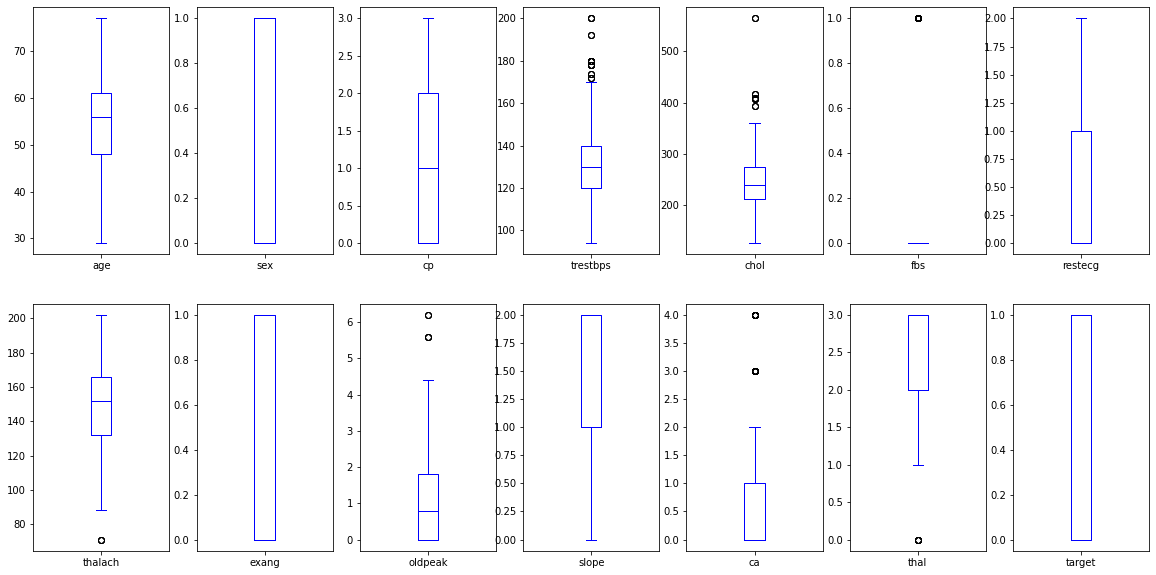

In [11]:
#Plotting outliers
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='blue');

Inference: Attributes 'tresbps', 'chol', 'ca', 'oldpeak' have outliers that need to be treated.

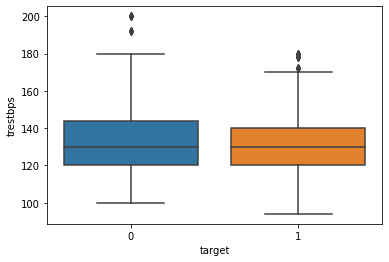

In [12]:
#Plotting them with the target variable for a better understanding
sns.boxplot(x="target", y="trestbps", data=df)

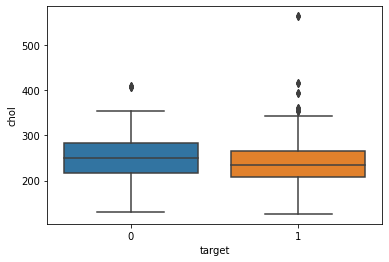

In [13]:
sns.boxplot(x="target", y="chol", data=df)


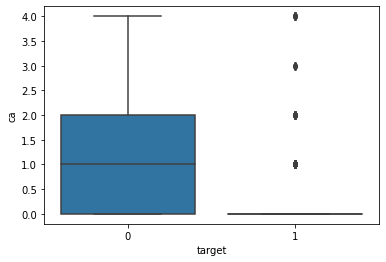

In [14]:
sns.boxplot(x="target", y="ca", data=df)

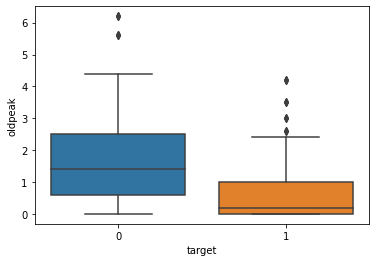

In [15]:
sns.boxplot(x="target", y="oldpeak", data=df)

In [16]:
#defining function for removing outliers
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:

      #Extracting each feature individually
        feature_data = df_out[each_feature]

        Q1 = np.percentile(feature_data, 22.) # 22nd percentile 
        Q3 = np.percentile(feature_data, 78.) # 78th percentile

        IQR = Q3-Q1 #Interquartile Range

        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        
        #printing no. of outliers
        if not drop:
            print(' No. of Outliers in {} is {}'.format(each_feature, len(outliers)))

          #Removing those outliers
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} removed!'.format(each_feature))

outlier_array = ['ca','trestbps','chol', 'oldpeak']

outliers(df[outlier_array])

 No. of Outliers in ca is 87
 No. of Outliers in trestbps is 30
 No. of Outliers in chol is 13
 No. of Outliers in oldpeak is 7


In [17]:
#Removing the outliers
outliers(df[outlier_array], drop = True)

Outliers from ca removed!
Outliers from trestbps removed!
Outliers from chol removed!
Outliers from oldpeak removed!


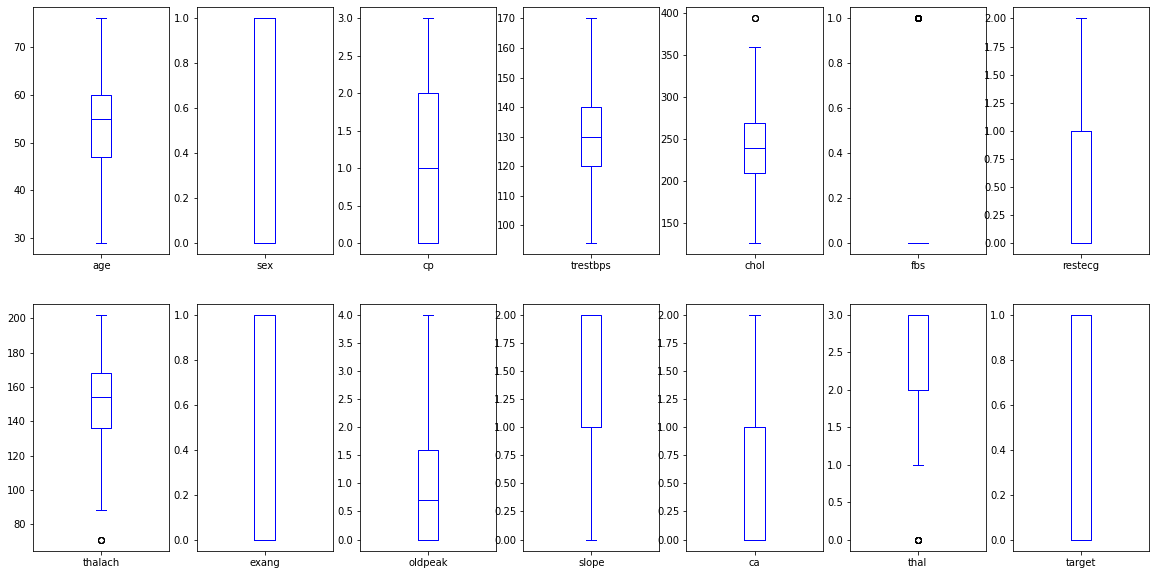

In [18]:
#Plotting again to confirm
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='blue');

###2.4 Distrubutions and relationship between variables

In [19]:
df["target"].value_counts()

1    487
0    408
Name: target, dtype: int64

Inference: Class labels of the target variable are almost balanced but the no. of diseased people are slightly more than healthy ones.

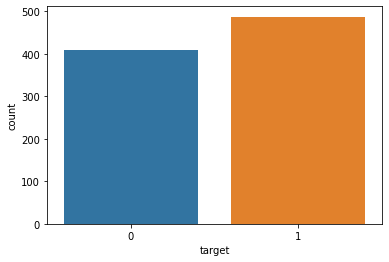

In [20]:
sns.countplot(x='target', data=df)
plt.show()

[]

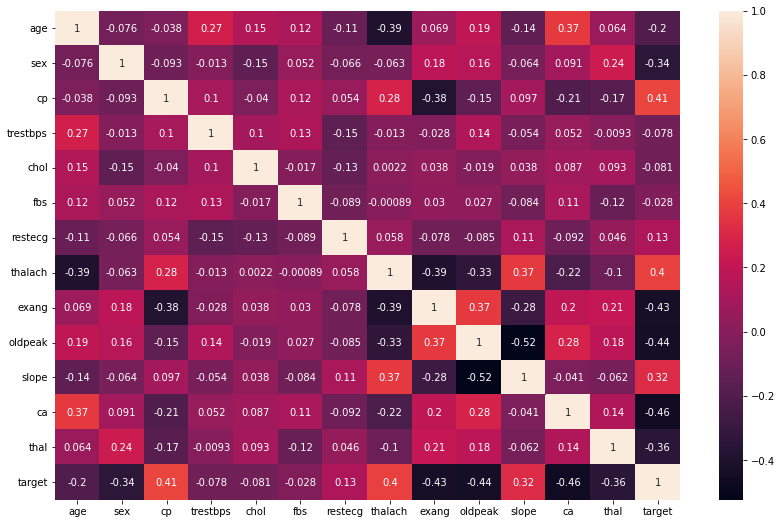

In [21]:
#Visualizing the correlation between the variables
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Inference: Most of the attributes have a low correlation with the target variable. (<0.5)

CA has the highest negative correlation i.e -0.46

In [22]:
'''
#Visualize the class label against the predictor variables
sns.pairplot(df,hue="target",height=8)
'''

'\n#Visualize the class label against the predictor variables\nsns.pairplot(df,hue="target",height=8)\n'

In [23]:
# define continuous variable & plot
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']  

####2.4.1 Age variable distribution

Text(0, 0.5, 'Age distribution')

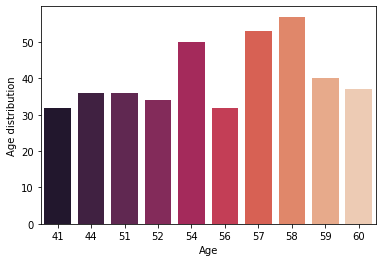

In [24]:
sns.barplot(x=df.age.value_counts()[:10].index,
y=df.age.value_counts()[:10].values, palette='rocket')
plt.xlabel('Age')
plt.ylabel('Age distribution')

Inference - Normally distributed. Most of the patients are in the age between 50s to 60s

####2.4.2 Gender distribution

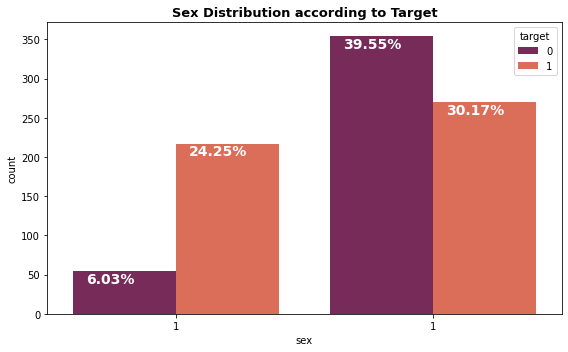

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['sex']
ax = sns.countplot(x='sex', hue='target', data=df, palette='rocket')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []

for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            #getting percentages on top of the stack
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

**Inference**: Among the diseased patients, males are higher than female.

####2.4.3 Chest pain distribution

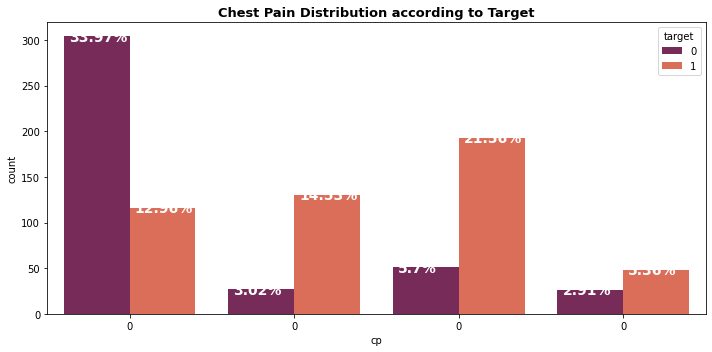

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['cp']

ax = sns.countplot(x='cp', hue='target', data=df, palette='rocket')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []

for i in ax.patches:
  #Getting the height of the stacks
    totals.append(i.get_height())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
    
plt.tight_layout()

**Inference**: Most of the healthy subjects also have chest pain. Chest pain can be subjective due to stress, physical activities and many more and varies between gender.

####2.4.4 thalassemia distribution

Text(0.5, 1.0, 'Disease classes according to thal')

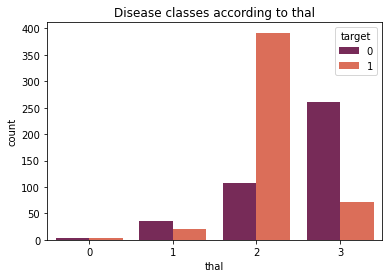

In [27]:
sns.countplot(x='thal', hue='target', data=df, palette='rocket').set_title('Disease classes according to thal')


####2.4.5 exercise induced angina distribution

Text(0.5, 1.0, 'Disease classes according to Exercise Induced Angina')

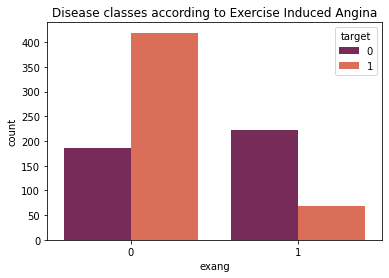

In [28]:
sns.countplot(x='exang', hue='target', data=df, palette='rocket').set_title('Disease classes according to Exercise Induced Angina')


####2.4.6 fasting blood sugar distribution

Text(0.5, 1.0, 'Disease classes according to fbs')

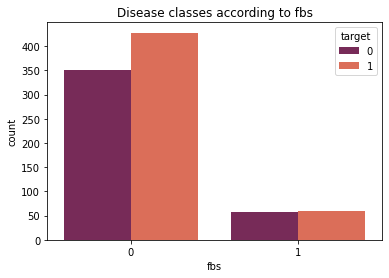

In [29]:
sns.countplot(x='fbs', hue='target', data=df, palette='rocket').set_title('Disease classes according to fbs')


Inference: fbs >120 mg/d is considered diabetic (True class). 
The number for class true, is lower compared to class false. However, if we look closely, there are higher number of heart disease patient without diabetes. This provide an indication that fbs might not be a strong feature differentiating between heart disease an non-disease patient.

####2.4.7 major vessals distribution

Text(0.5, 1.0, 'Disease classes according to Num Major Vessel')

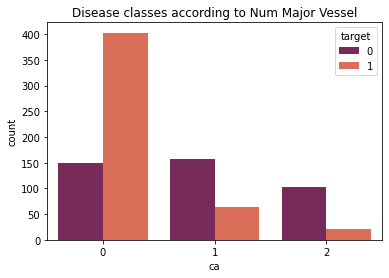

In [30]:
sns.countplot(x='ca', hue='target', data=df, palette='rocket').set_title('Disease classes according to Num Major Vessel')


####2.4.8 Visualzing alltogether

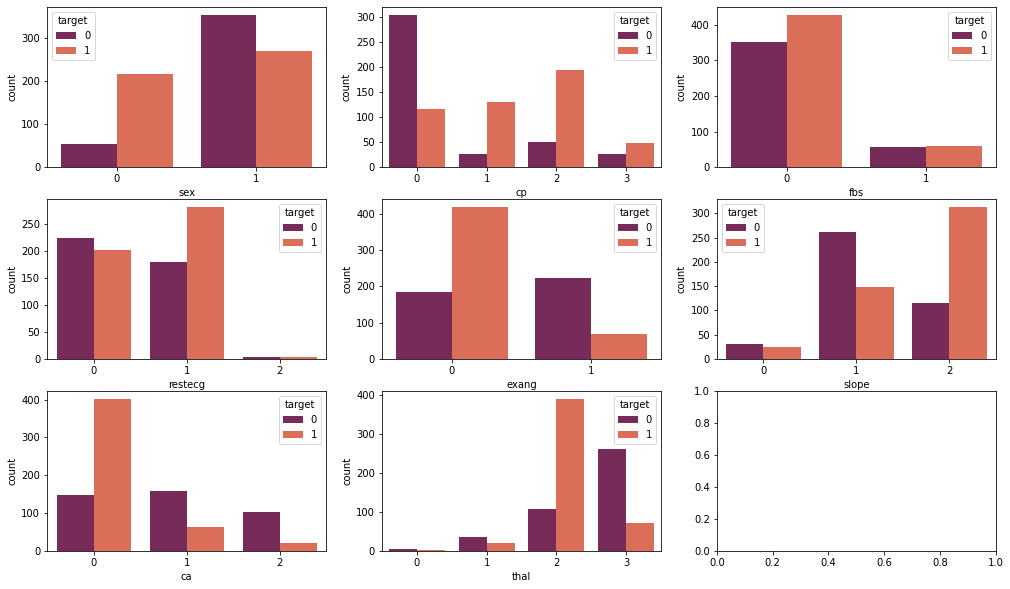

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax, palette='rocket')

##3. Tech Stack

```
Libraries used: 
1. Pandas and Numpy for Data Manipulation
2. Matplotlib and seaborn for Visualisation
3. pandas_profiling for gnerating the profile report
4. SKLearn for model building process
5. XGBoost for boosting the model
```

#Phase- 2 Model Building

##1. Processing for Model Building

###1.1 Importing needed libraries for Model Building

In [32]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split

In [33]:
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

###1.2 Splitting into training and testing datasets

In [34]:
y = df["target"]
X = df.drop('target',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

###1.3 Scaling the independent variables using standard scaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###2. Making the individual Models for the ensemble model selection

####2.1 Logistic Regression

In [36]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("Confusion matrix")
print(lr_conf_matrix)
print("\n")

print("Accuracy of Logistic Regression:",lr_acc_score*100)
print("Classification Report: ")
print(classification_report(y_test,lr_predict))

Confusion matrix
[[74 14]
 [ 9 82]]


Accuracy of Logistic Regression: 87.15083798882681
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        88
           1       0.85      0.90      0.88        91

    accuracy                           0.87       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179



####2.2 Naive Bayes

In [37]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)

nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("Confusion matrix")
print(nb_conf_matrix)
print("\n")

print("Accuracy of Naive Bayes model:",nb_acc_score*100)
print("Classification Report: ")
print(classification_report(y_test,nbpred))

Confusion matrix
[[75 13]
 [15 76]]


Accuracy of Naive Bayes model: 84.35754189944134
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        88
           1       0.85      0.84      0.84        91

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



####2.3 Random Forest Classfier

In [38]:
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion matrix")
print(rf_conf_matrix)
print("\n")

print("Accuracy of Random Forest:",rf_acc_score*100)
print("Classification Report: ")
print(classification_report(y_test,rf_predicted))

Confusion matrix
[[83  5]
 [ 6 85]]


Accuracy of Random Forest: 93.85474860335195
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        88
           1       0.94      0.93      0.94        91

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



####2.4 Extreme Gradient Boost

In [39]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)

xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("Confusion matrix")
print(xgb_conf_matrix)
print("\n")

print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100)
print("Classification Report: ")
print(classification_report(y_test,xgb_predicted))

Confusion matrix
[[78 10]
 [ 9 82]]


Accuracy of Extreme Gradient Boost: 89.3854748603352
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        88
           1       0.89      0.90      0.90        91

    accuracy                           0.89       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.89      0.89      0.89       179



####2.5 K-NeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("Confusion matrix")
print(knn_conf_matrix)
print("\n")

print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100)
print("Classification Report: ")
print(classification_report(y_test,knn_predicted))

Confusion matrix
[[72 16]
 [12 79]]


Accuracy of K-NeighborsClassifier: 84.35754189944134
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        88
           1       0.83      0.87      0.85        91

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



####2.6 DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

print("Confusion matrix")
print(dt_conf_matrix)
print("\n")

print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100)
print("Classification Report: ")
print(classification_report(y_test,dt_predicted))

Confusion matrix
[[77 11]
 [ 5 86]]


Accuracy of DecisionTreeClassifier: 91.06145251396647
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        88
           1       0.89      0.95      0.91        91

    accuracy                           0.91       179
   macro avg       0.91      0.91      0.91       179
weighted avg       0.91      0.91      0.91       179



####2.7 Support Vector Classifier

In [42]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)

svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

print("confusion matrix")
print(svc_conf_matrix)
print("\n")

print("Accuracy of Support Vector Classifier:",svc_acc_score*100)
print("Classification Report: ")
print(classification_report(y_test,svc_predicted))

confusion matrix
[[85  3]
 [ 4 87]]


Accuracy of Support Vector Classifier: 96.08938547486034
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        88
           1       0.97      0.96      0.96        91

    accuracy                           0.96       179
   macro avg       0.96      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179



###3. Plotting feature Importance

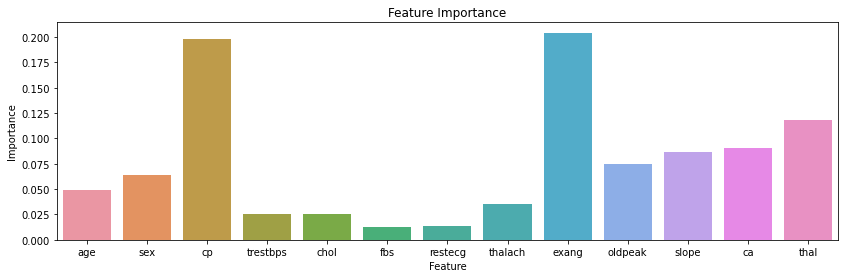

In [43]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})

plt.figure(figsize=(14,4))
plt.title("Feature Importance")
ax = sns.barplot(x= imp_feature['Feature'], y= imp_feature['Importance'], data=imp_feature)

###4. Plotting the ROC Curve for all the models

In [44]:
#Alloting FPR and TPR values for all the models
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

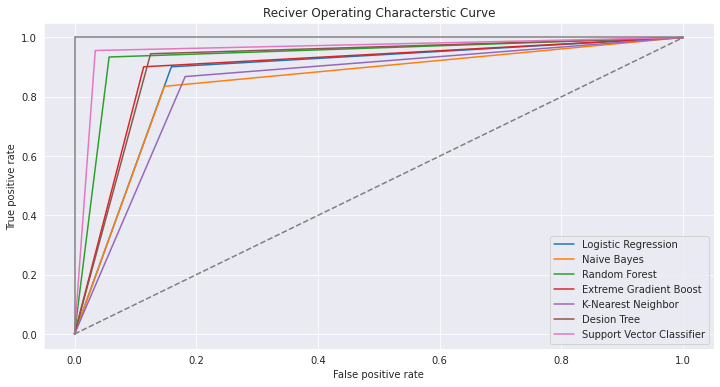

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.legend()
plt.show()

###5. Model evaluation

In [46]:
model_eval = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 
                          'Accuracy': [lr_acc_score*100, nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,
                                 dt_acc_score*100,svc_acc_score*100]})
model_eval

,Model,Accuracy
0,Logistic Regression,87.150838
1,Naive Bayes,84.357542
2,Random Forest,93.854749
3,Extreme Gradient Boost,89.385475
4,K-Nearest Neighbour,84.357542
5,Decision Tree,91.061453
6,Support Vector Machine,96.089385


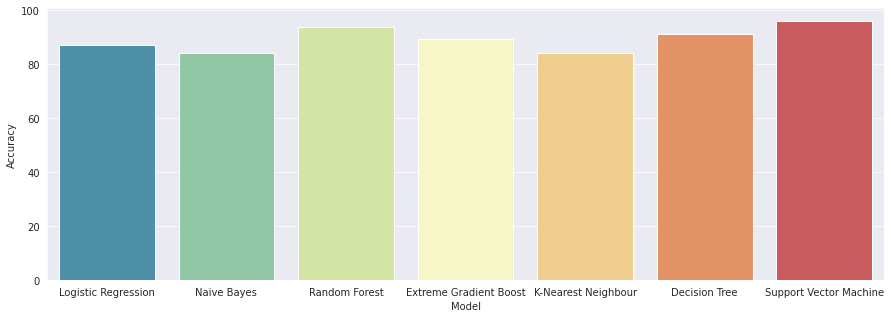

In [47]:
#Plotting the accuracy
plt.figure(figsize=(15,5))
ax = sns.barplot(x = model_eval['Model'], y = model_eval['Accuracy'], data = model_eval, palette = 'Spectral_r')

###6. Creating the Stacking ensemble

In [48]:
#Converting y_train from series type to numpy array 
y_train = y_train.to_numpy()

In [49]:
!pip install --upgrade scikit-learn==0.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 3.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22 which is incompatible.


In [50]:
from mlxtend.classifier import StackingCVClassifier

# (dt,rf,svc) have been chosen as the models with the highest accuracy
#the meta-classifier is the model which makes the final prediction
scv=StackingCVClassifier(classifiers=[dt,rf,svc],meta_classifier= svc)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)

scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)

print("Confusion matrix")
print(scv_conf_matrix)
print("\n")

print("Accuracy of StackingCVClassifier:",scv_acc_score*100)
print("Classification Report")
print(classification_report(y_test,scv_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Confusion matrix
[[83  5]
 [ 9 82]]


Accuracy of StackingCVClassifier: 92.17877094972067
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.94      0.90      0.92        91

    accuracy                           0.92       179
   macro avg       0.92      0.92      0.92       179
weighted avg       0.92      0.92      0.92       179



##Conclusion

~~~
1) Support Vector Machine gives the best Accuracy as compared to other models.

2) Exercise induced angina and Chest pain are the major symptoms of heart attack.

3) Ensembling technique increase the accuracy of the model.
~~~

###Saving the file

In [51]:
import pickle

In [52]:
pickle_out = open("Classifier.pkl", "wb")
pickle.dump(svc, pickle_out)
pickle_out.close()